/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


['Unnamed: 0', 'id', 'organization_id', 'url', 'type', 'species', 'age', 'gender', 'size', 'coat', 'tags', 'name', 'description', 'photos', 'status', 'status_changed_at', 'published_at', 'distance', 'breeds.primary', 'breeds.secondary', 'breeds.mixed', 'breeds.unknown', 'colors.primary', 'colors.secondary', 'colors.tertiary', 'attributes.spayed_neutered', 'attributes.house_trained', 'attributes.declawed', 'attributes.special_needs', 'attributes.shots_current', 'environment.children', 'environment.dogs', 'environment.cats', 'contact.email', 'contact.phone', 'contact.address.address1', 'contact.address.address2', 'contact.address.city', 'contact.address.state', 'contact.address.postcode', 'contact.address.country', '_links.self.href', '_links.type.href', '_links.organization.href', 'City', 'time_diff', 'target_hour', 'target_day', 'log_target_hour', 'top_ten', 'num_tags', 'num_photos', 'num_words_desc', 'bin_month_target', 'bin_week_target']
55


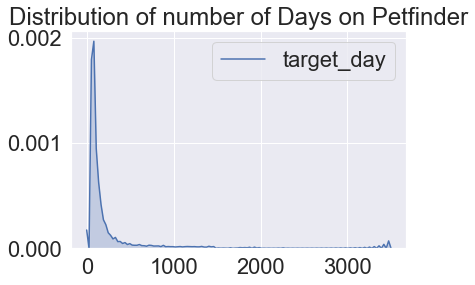

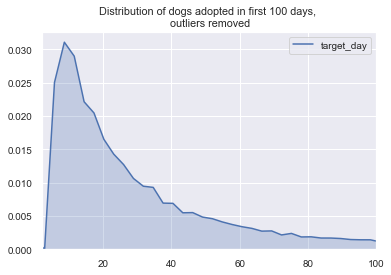

In [20]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#read in data 
chidat = pd.read_csv("data/Chicago_adopted_20k_Jan_21.csv") 
chidat['City'] = 'Chicago'

corpdat = pd.read_csv("data/Corpus_adopted_20k_Jan_29.csv") 
corpdat['City'] = 'Corpus'

houstdat = pd.read_csv("data/Houston_adopted_20k_Jan_21.csv") 
houstdat['City'] = 'Houston'

elpdat = pd.read_csv("data/ElPaso_adopted_20k_Jan_21.csv") 
elpdat['City'] = 'ElPaso'

Milwdat = pd.read_csv("data/Milw_adopted_20k_Jan_29.csv") 
Milwdat['City'] = 'Milw'

Minndat = pd.read_csv("data/Minneapolis_adopted_20k_Jan_21.csv") 
Minndat['City'] = 'Minne'

dendat = pd.read_csv("data/Denver_adopted_20k_Jan_29.csv") 
dendat['City'] = 'Denver'

stldat = pd.read_csv("data/StL_adopted_20k_Jan_21.csv")
stldat['City'] = 'StLouis'

inddat = pd.read_csv("data/Indy_adopted_20k_Jan_21.csv")
inddat['City'] = 'Indy'

petdat = pd.concat([chidat,corpdat, houstdat,elpdat,Milwdat, Minndat,dendat, stldat, inddat])

#petdat = ReformatDates(petdat)
    
fmt ='%Y-%m-%dT%H:%M:%S+0000'
petdat['published_at'] =  pd.to_datetime(petdat['published_at'], format=fmt)
petdat['status_changed_at'] =  pd.to_datetime(petdat['status_changed_at'], format=fmt)
petdat['time_diff'] = petdat['status_changed_at'] - petdat['published_at']
petdat['target_hour'] = petdat.time_diff.astype('timedelta64[h]')
petdat['target_day'] = petdat.time_diff.astype('timedelta64[D]')
petdat['log_target_hour'] = np.log(petdat['target_hour'])

#add top ten breed variable 
my_series = petdat['breeds.primary']
myboolseries = my_series.str.contains('Labrador Retriever|German Shepherd Dog|French Bulldog|Beagle|Pointer|oodle|Rottweiler|Yorkshire|Golden Retriever', regex=True)
petdat['top_ten'] = myboolseries

#calculate number of tags
petdat['num_tags']= petdat['tags'].str.count(',', re.I) 

#calculate number of photos
petdat['num_photos']= petdat['photos'].str.count('small', re.I) 

#calculate number of words in description 
petdat['num_words_desc']= petdat['description'].str.count(' ', re.I) 

#calculate if adopted > 1 month 
petdat['bin_month_target'] = np.where(petdat['target_day']>30, 0, 1)

#calculate if adopted > 1 week 
petdat['bin_week_target'] = np.where(petdat['target_day']>7, 0, 1)

#print(petdat.head())
print(list(petdat.columns))
print(len(list(petdat.columns)))
#print(petdat.shape)

sns.set(font_scale=2)
plot1= sns.kdeplot(petdat['target_day'], bw=2, shade = True)
plt.title('Distribution of number of Days on Petfinder')
plt.show(plot1)

#remove data where dogs are there less than a day or more than a year
petdat = petdat[(petdat["target_day"] > 2) & (petdat["target_day"] <365)]


sns.set(font_scale=.9)
plot = sns.kdeplot(petdat['target_day'], bw=1, shade = True)
plt.xlim(2, 100)
plt.title('Distribution of dogs adopted in first 100 days, \n outliers removed')
plt.show(plot)

#petdat['target_day'].mode() #   3 (?????)
#petdat['target_day'].mean() # 36.07
#petdat['target_day'].median()  #18



#petdat.to_csv('backup_petdata_Jan30.csv')




(5, 8)

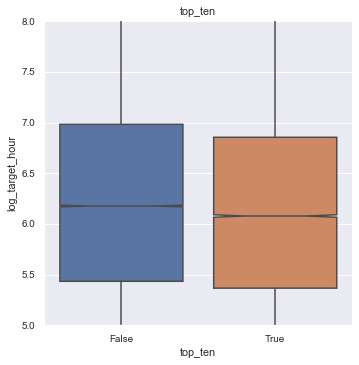

In [22]:


sns.catplot(x="top_ten", y="log_target_hour", kind="box", notch = True, data=petdat);
plt.title("top_ten")
plt.ylim(5,8)




In [10]:

# plot

sns.catplot(x="top_ten", y="log_target_hour", kind="box", notch = True, data=petdat);
plt.title('Top_ten")


sns.catplot(x="size", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title(" size")

sns.catplot(x="age", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("age")

sns.catplot(x="gender", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("gender ")

sns.catplot(x="coat", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("coat")

sns.catplot(x="attributes.special_needs", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("attributes.special_needs")

sns.catplot(x="attributes.house_trained", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("attributes.house_trained")

sns.catplot(x="attributes.shots_current", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("attributes.shots_current")

sns.catplot(x="environment.children", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("environment.children")

sns.catplot(x="environment.dogs", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("environment.dogs")

sns.catplot(x="environment.cats", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("environment.dogs")

sns.catplot(x='num_tags', y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("num_tags")

sns.catplot(x='num_photos', y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title('num_photos')

sns.catplot(x='num_words_desc', y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title('num_words_desc')








ValueError: Could not interpret input 'log_target_hour'

In [21]:
#get shelter data 
#print(list(petdat.columns))
shelterdat = petdat.filter(['target_day','organization_id','City','contact.email', 'contact.phone', 'contact.address.city', 'contact.address.state'], axis=1)

my_means = shelterdat.groupby((['organization_id', 'City']))['target_day'].mean()
print(len(my_means))

metashelter = shelterdat.groupby(['organization_id', 'City'])

metashelter.reset_index().to_csv('metashelter.csv')



metashelt2 = pd.read_csv('metashelter.csv')
metashelt2['mean_days'] = my_means

print(metashelt2.head())


#.apply(lambda x: x.sort_values(["lifeExp"], ascending = False)).reset_index(drop=True)
# select top N rows within each continent
#g.groupby('continent').head(1)

#print(my_means.head())
#df.to_csv('file1.csv') 



1143


AttributeError: Cannot access callable attribute 'reset_index' of 'DataFrameGroupBy' objects, try using the 'apply' method